<a href="https://colab.research.google.com/github/fpinto2021/Mechanical-Vibrations/blob/main/Project1Problem3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

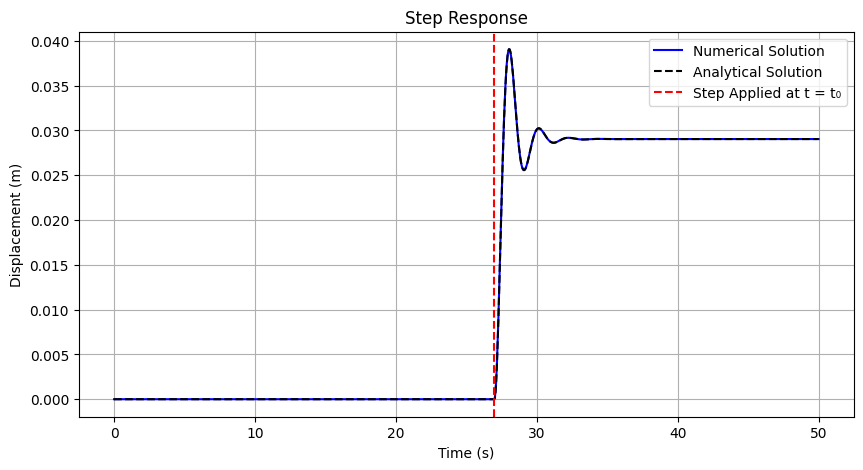

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Given parameters
S = 27
F0 = 30
k = (S * 4 + 925)
omega_n = 3.16
zeta = (S * 0.01 + 0.05)
t0 = S

# Computing mass and damping coefficient
m = k / omega_n**2
c = 2 * zeta * np.sqrt(m * k)
omega_d = omega_n * np.sqrt(1 - zeta**2)
X_final = F0 / k

# Defining step function
def step_force(t):
    return F0 if t >= t0 else 0

# Defining first-order equations
def system(t, y):
    x, v = y
    dxdt = v
    dvdt = (step_force(t) - c * v - k * x) / m
    return [dxdt, dvdt]

# Time range
t_span = (0, 50)
t_eval = np.linspace(0, 50, 1000)

# Initial conditions
x0 = [0, 0]

# Solving numerically
sol = solve_ivp(system, t_span, x0, t_eval=t_eval)

# Computing analytical solution
t_values = sol.t
x_analytical = np.zeros_like(t_values)

for i, t in enumerate(t_values):
    if t >= t0:
        x_analytical[i] = X_final * (1 - np.exp(-zeta * omega_n * (t - t0)) *
                (np.cos(omega_d * (t - t0)) + (zeta * omega_n / omega_d) * np.sin(omega_d * (t - t0))))

# Plotting our results
plt.figure(figsize=(10, 5))
plt.plot(sol.t, sol.y[0], 'b', label="Numerical Solution")
plt.plot(t_values, x_analytical, 'k--', label="Analytical Solution")
plt.axvline(t0, color='r', linestyle='dashed', label="Step Applied at t = t₀")
plt.xlabel("Time (s)")
plt.ylabel("Displacement (m)")
plt.title("Step Response")
plt.legend()
plt.grid()
plt.show()
